In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read JSON file
with open('rollout_times_100_ovr1.json') as f:
    data = json.load(f)

In [3]:
# Extract CPU cores and execution time from the dictionary
processes = list(data.keys())
mean_execution_time = []
std_execution_time = []
for p in processes:
    execution_time = data[p]
    mean = np.mean(execution_time)
    std = np.std(execution_time)
    mean_execution_time.append(mean)
    std_execution_time.append(std)

In [4]:
# Plot steps/s vs CPU cores
eval_mean_values = []
eval_std_values = []

for p in processes:
    times = np.asarray(data[p])  # Discard the first entry
    evals_per_sec = (100 * int(p)) / times
    mean = np.mean(evals_per_sec)
    std = np.std(evals_per_sec)
    eval_mean_values.append(mean)
    eval_std_values.append(std)

print("Eval mean: ", eval_mean_values)

Eval mean:  [206.752736412929, 408.6882987700575, 687.7820463741888, 867.5634003834417, 871.1246669617337, 866.3407538889654, 872.7443806868301, 879.0957529382956, 881.3406514212926]


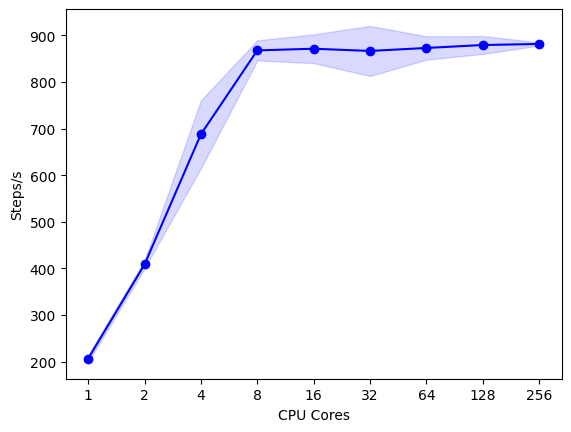

In [5]:
# Plot average execution time with uncertainty region

plt.plot(processes, eval_mean_values, marker='o', color='blue')
plt.fill_between(processes, np.array(eval_mean_values) - np.array(eval_std_values), 
                 np.array(eval_mean_values) + np.array(eval_std_values), alpha=0.15, color='blue')
plt.xlabel('CPU Cores')
plt.ylabel('Steps/s')
plt.savefig('parallelsteps.png')
plt.show()

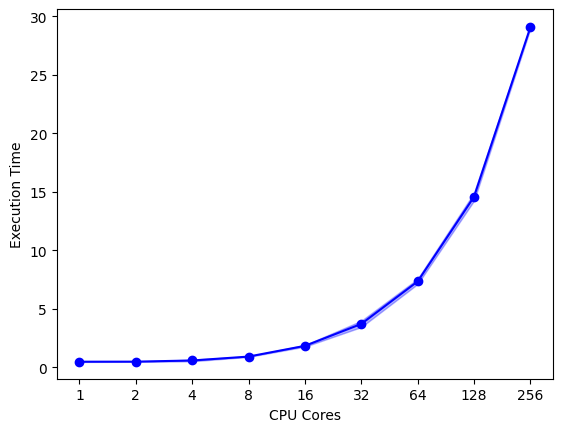

In [6]:
# Plot average execution time with uncertainty region

plt.plot(processes, mean_execution_time, marker='o', color='blue')
plt.fill_between(processes, np.array(mean_execution_time) - np.array(std_execution_time), 
                 np.array(mean_execution_time) + np.array(std_execution_time), alpha=0.3, color='blue')
plt.xlabel('CPU Cores')
plt.ylabel('Execution Time')
plt.savefig('parallelprocesses.png')
plt.show()